In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
policy = pd.read_csv('../output/policy_iteration_list.csv', header=None)
value = pd.read_csv('../output/value_iteration_utilities.csv', header=None)

In [3]:
policy = policy.T

In [4]:
value = value.T

In [5]:
value

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.000,0.000,0.000,0.000,0.0000,0.0000
1,1.0000,0.0,1.0000,-0.0400,-0.0400,1.0000,-0.0400,-1.0000,-0.0400,1.0000,...,0.0,0.0,-1.0000,-0.0400,-0.040,-0.040,-0.040,-0.040,-0.0400,-0.0400
2,1.9900,0.0,1.8870,0.8470,0.7440,1.8870,0.6490,-1.0390,0.7520,1.7840,...,0.0,0.0,-1.0390,0.6490,-0.079,-0.079,-0.079,-0.079,-0.0790,-0.0790
3,2.9701,0.0,2.7652,1.7150,1.6018,2.7550,1.4974,-0.5240,1.5282,2.5712,...,0.0,0.0,-0.4190,1.3343,-0.118,-0.118,-0.118,-0.118,-0.1180,0.4582
4,3.9403,0.0,3.6335,2.5743,2.4591,3.6133,2.4086,0.1372,2.3526,3.3494,...,0.0,0.0,0.2363,2.0789,-0.157,-0.157,-0.157,-0.157,0.2696,1.0503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,68.5190,0.0,63.5650,62.3940,61.1740,61.8580,66.9120,64.4020,63.0640,62.9170,...,0.0,0.0,58.0680,59.0870,61.456,60.247,59.054,57.875,57.0880,57.8180
116,68.8330,0.0,63.8800,62.7090,61.4890,62.1710,67.2270,64.7160,63.3780,63.2310,...,0.0,0.0,58.3820,59.4020,61.771,60.562,59.369,58.190,57.4030,58.1330
117,69.1450,0.0,64.1910,63.0210,61.8000,62.4820,67.5380,65.0280,63.6900,63.5430,...,0.0,0.0,58.6940,59.7130,62.083,60.874,59.680,58.501,57.7150,58.4440
118,69.4540,0.0,64.5000,63.3290,62.1090,62.7900,67.8470,65.3370,63.9990,63.8510,...,0.0,0.0,59.0030,60.0220,62.391,61.182,59.989,58.810,58.0230,58.7530


In [6]:
# The grid is 6x6. Label all columns in value with cell numbers (0,1)-(0,5), (1,0)-(1,5), ... (5,0)-(5,5)
value.columns = ['(0,0)', '(0,1)', '(0,2)', '(0,3)', '(0,4)', '(0,5)', '(1,0)', '(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)', '(2,0)', '(2,1)', '(2,2)', '(2,3)', '(2,4)', '(2,5)', '(3,0)', '(3,1)', '(3,2)', '(3,3)', '(3,4)', '(3,5)', '(4,0)', '(4,1)', '(4,2)', '(4,3)', '(4,4)', '(4,5)', '(5,0)', '(5,1)', '(5,2)', '(5,3)', '(5,4)', '(5,5)']
policy.columns = ['(0,0)', '(0,1)', '(0,2)', '(0,3)', '(0,4)', '(0,5)', '(1,0)', '(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)', '(2,0)', '(2,1)', '(2,2)', '(2,3)', '(2,4)', '(2,5)', '(3,0)', '(3,1)', '(3,2)', '(3,3)', '(3,4)', '(3,5)', '(4,0)', '(4,1)', '(4,2)', '(4,3)', '(4,4)', '(4,5)', '(5,0)', '(5,1)', '(5,2)', '(5,3)', '(5,4)', '(5,5)']

In [7]:
value

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)","(1,2)","(1,3)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.000,0.000,0.000,0.000,0.0000,0.0000
1,1.0000,0.0,1.0000,-0.0400,-0.0400,1.0000,-0.0400,-1.0000,-0.0400,1.0000,...,0.0,0.0,-1.0000,-0.0400,-0.040,-0.040,-0.040,-0.040,-0.0400,-0.0400
2,1.9900,0.0,1.8870,0.8470,0.7440,1.8870,0.6490,-1.0390,0.7520,1.7840,...,0.0,0.0,-1.0390,0.6490,-0.079,-0.079,-0.079,-0.079,-0.0790,-0.0790
3,2.9701,0.0,2.7652,1.7150,1.6018,2.7550,1.4974,-0.5240,1.5282,2.5712,...,0.0,0.0,-0.4190,1.3343,-0.118,-0.118,-0.118,-0.118,-0.1180,0.4582
4,3.9403,0.0,3.6335,2.5743,2.4591,3.6133,2.4086,0.1372,2.3526,3.3494,...,0.0,0.0,0.2363,2.0789,-0.157,-0.157,-0.157,-0.157,0.2696,1.0503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,68.5190,0.0,63.5650,62.3940,61.1740,61.8580,66.9120,64.4020,63.0640,62.9170,...,0.0,0.0,58.0680,59.0870,61.456,60.247,59.054,57.875,57.0880,57.8180
116,68.8330,0.0,63.8800,62.7090,61.4890,62.1710,67.2270,64.7160,63.3780,63.2310,...,0.0,0.0,58.3820,59.4020,61.771,60.562,59.369,58.190,57.4030,58.1330
117,69.1450,0.0,64.1910,63.0210,61.8000,62.4820,67.5380,65.0280,63.6900,63.5430,...,0.0,0.0,58.6940,59.7130,62.083,60.874,59.680,58.501,57.7150,58.4440
118,69.4540,0.0,64.5000,63.3290,62.1090,62.7900,67.8470,65.3370,63.9990,63.8510,...,0.0,0.0,59.0030,60.0220,62.391,61.182,59.989,58.810,58.0230,58.7530


Text(0, 0.5, 'Utilities')

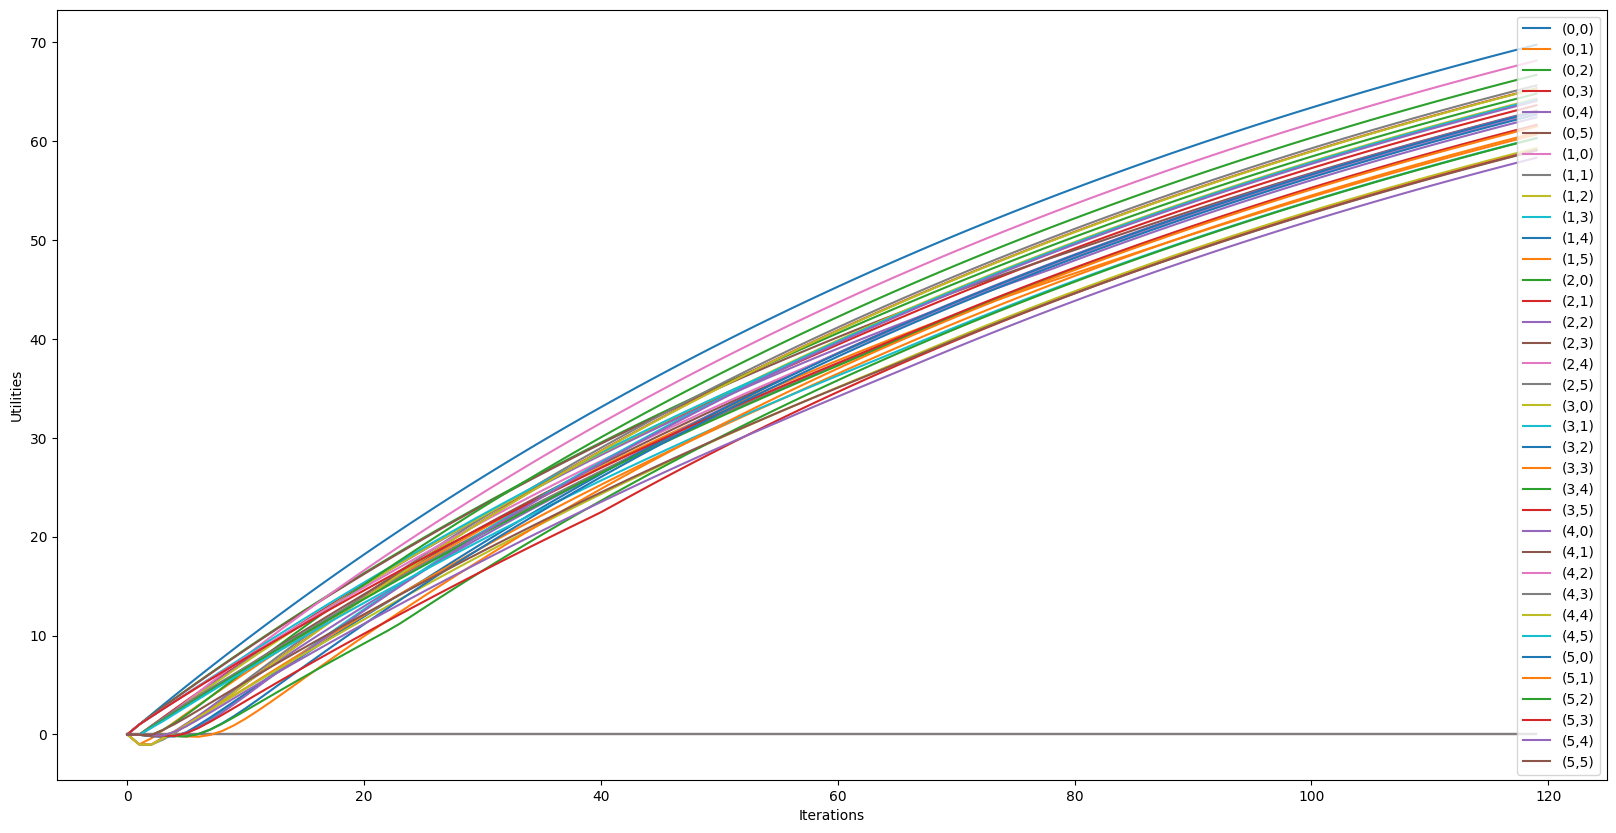

In [8]:
# Create line plot for value with legend as column names. Make plot wide
value.plot.line(figsize=(20,10))
# Label x-axis as 'Iterations'
plt.xlabel('Iterations')
# Label y-axis as 'Utilities'
plt.ylabel('Utilities')


In [9]:
policy

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)","(1,2)","(1,3)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
0,0.000,0.0,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,...,0.0,0.0,0.000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0000
1,18.209,0.0,13.896,10.557,6.8996,9.1265,1.9747,9.2734,12.486,11.368,...,0.0,0.0,-5.047,1.3692,-0.749,-0.736,-0.730,-0.730,-0.037,0.6682
2,33.102,0.0,26.992,25.832,24.7250,22.8600,30.8740,23.2350,25.575,25.522,...,0.0,0.0,20.068,21.9250,15.975,17.017,17.955,18.905,19.867,20.8180
3,45.284,0.0,38.231,37.097,35.9540,35.6840,43.6770,41.1670,37.495,37.277,...,0.0,0.0,32.441,33.3280,28.270,27.924,28.986,30.062,31.152,32.0940
4,55.247,0.0,49.992,48.817,47.5580,47.6230,53.6410,51.1300,49.759,49.574,...,0.0,0.0,44.660,45.5560,47.410,39.961,41.111,42.269,43.437,44.2610
5,63.396,0.0,58.403,57.232,56.0070,56.5440,61.7900,59.2790,57.937,57.785,...,0.0,0.0,52.924,53.9250,56.334,55.125,49.430,50.570,51.724,52.6310
6,70.061,0.0,65.102,63.932,62.7110,63.3610,68.4550,65.9440,64.606,64.458,...,0.0,0.0,59.607,60.6230,62.999,61.790,60.597,57.260,58.412,59.3300


Text(0, 0.5, 'Utility')

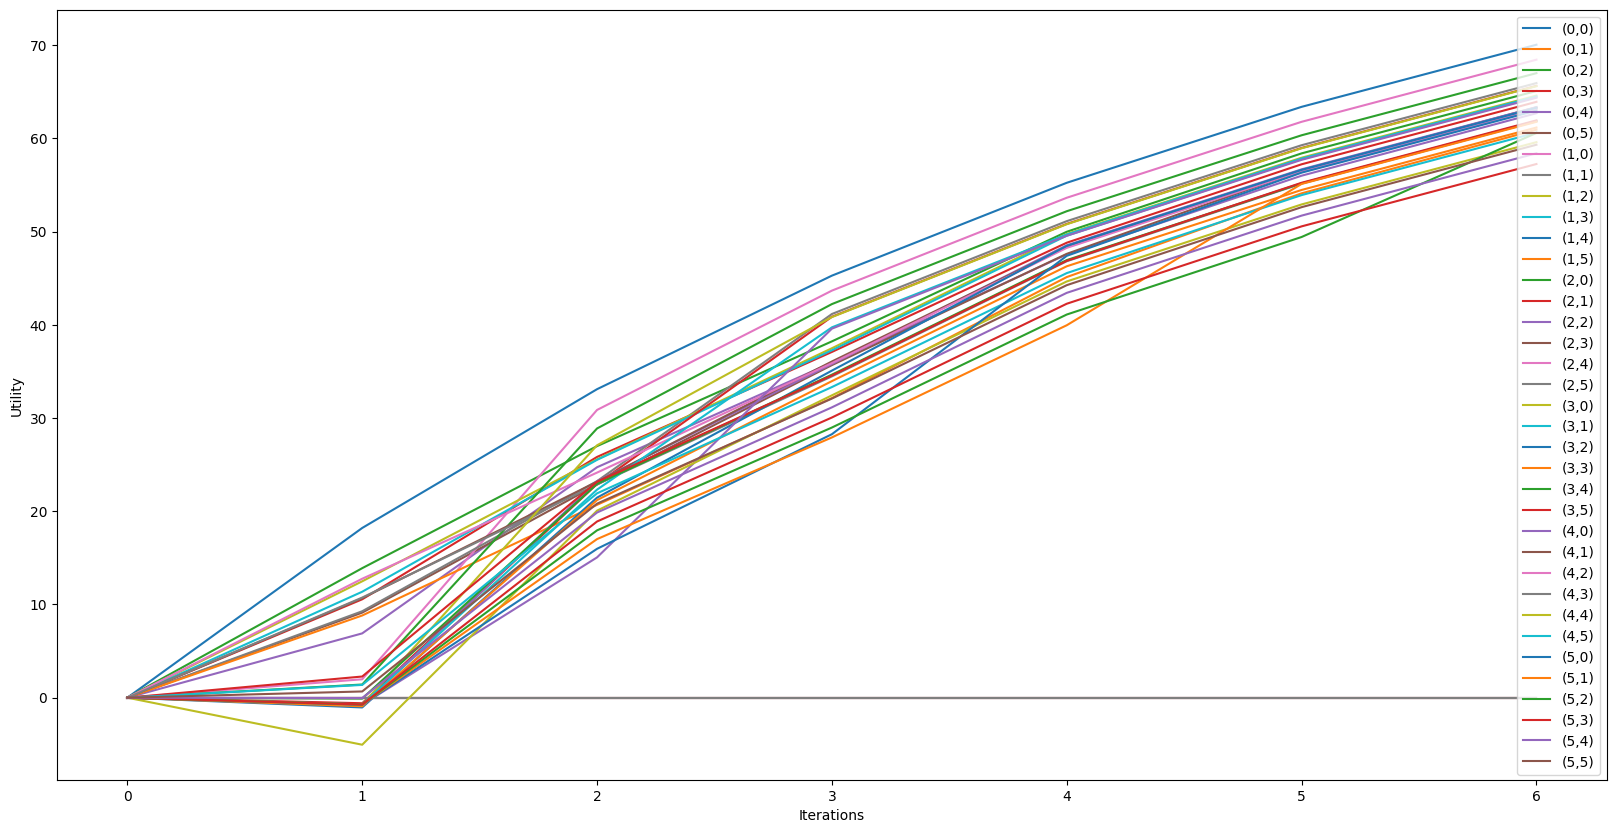

In [10]:
# Create line plot for policy with legend as column names. Make plot wide
policy.plot.line(figsize=(20,10))
# Label x-axis as 'Iterations'
plt.xlabel('Iterations')
# Label y-axis as 'Policy'
plt.ylabel('Utility')